In [158]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


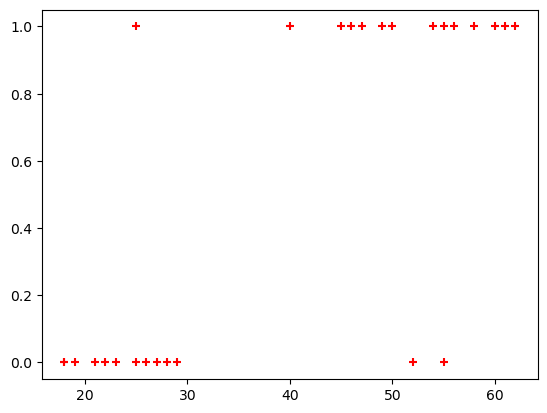

In [159]:
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)
X_test


,age
24,50
19,18
8,62
21,26
6,55
9,61


In [161]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [162]:
model.fit(X_train, y_train)


LogisticRegression()

In [163]:
X_test

,age
24,50
19,18
8,62
21,26
6,55
9,61


In [164]:
y_predicted = model.predict(X_test)
model.predict_proba(X_test)

array([[0.10181995, 0.89818005],
       [0.94986255, 0.05013745],
       [0.01635579, 0.98364421],
       [0.84048897, 0.15951103],
       [0.0484775 , 0.9515225 ],
       [0.01913863, 0.98086137]])

In [165]:
model.score(X_test,y_test)


0.8333333333333334

In [166]:
y_predicted

array([1, 0, 1, 0, 1, 1], dtype=int64)

In [167]:
X_test

,age
24,50
19,18
8,62
21,26
6,55
9,61


In [168]:
cof = model.coef_
cof

array([[0.1599598]])

In [169]:
intercept = model.intercept_
intercept

array([-5.82082555])

In [170]:
#Lets define sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [171]:
def prediction_function(age):
    z = cof * age + intercept
    y = sigmoid(z)
    return y

In [172]:
age = 35
prediction_function(age)

0.4446694027576098

In [173]:
prediction_function(43)

0.7422021494806522

In [ ]:
#Exercise
#Downloade employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
#Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
#Plot bar charts showing impact of employee salaries on retention
#Plot bar charts showing corelation between department and employee retention
#Now build logistic regression model using variables that were narrowed down in step 1
#Measure the accuracy of the model

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("HR_comma_sep.csv")
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [190]:
#Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
df.shape


(14999, 10)

In [191]:
left = df[df.left==1]
left.shape

(3571, 10)

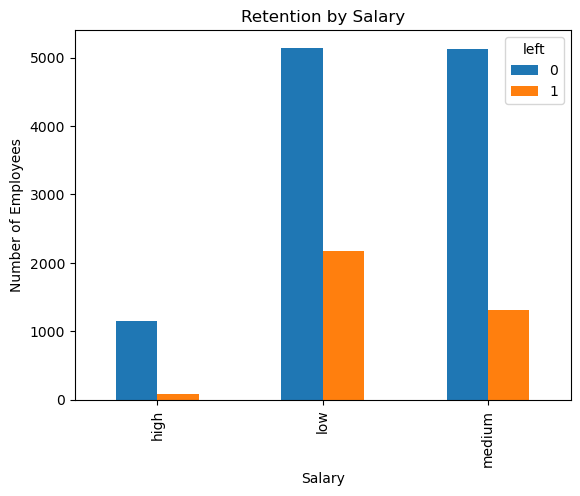

In [192]:
#Plot bar charts showing impact of employee salaries on retention
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.title('Retention by Salary')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()


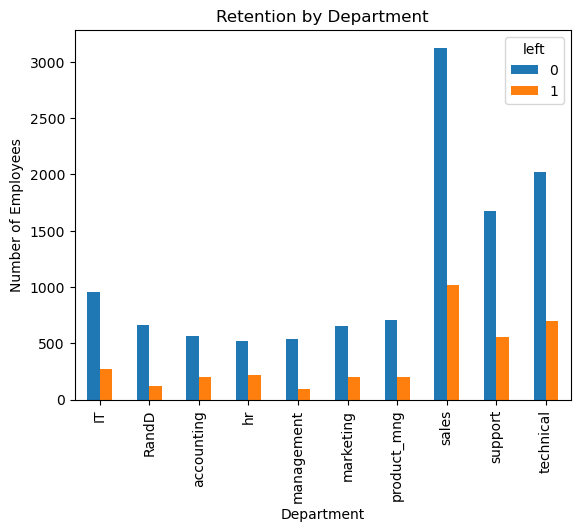

In [193]:
#Plot bar charts showing corelation between department and employee retention
pd.crosstab(df.Department,df.left).plot(kind='bar')
plt.title('Retention by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['satisfaction_level']],df.left,train_size=0.8)
X_test


,satisfaction_level
6807,0.96
9532,0.85
14463,0.19
98,0.11
9155,0.59
...,...
8770,0.57
11910,0.37
12460,0.43
9607,0.97


In [196]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [197]:
model.fit(X_train, y_train)



LogisticRegression()

In [198]:
X_test



,satisfaction_level
6807,0.96
9532,0.85
14463,0.19
98,0.11
9155,0.59
...,...
8770,0.57
11910,0.37
12460,0.43
9607,0.97


In [199]:
y_predicted = model.predict(X_test)
model.predict_proba(X_test)


array([[0.93562768, 0.06437232],
       [0.90560165, 0.09439835],
       [0.44233977, 0.55766023],
       ...,
       [0.66257312, 0.33742688],
       [0.93786536, 0.06213464],
       [0.47044328, 0.52955672]])

In [200]:
model.score(X_test,y_test)

0.7726666666666666